# DELHI

In [56]:
import pandas as pd

# Load the datasets for Delhi
df_enrolment_dl = pd.read_csv('/content/Delhi Enrolment State.csv')
df_demographic_dl = pd.read_csv('/content/Delhi demographic state.csv')
df_biometric_dl = pd.read_csv('/content/Delhi biometric update.csv')

print("Delhi Enrolment Dataset:")
print(df_enrolment_dl.head())
print(df_enrolment_dl.info())
print(df_enrolment_dl.describe())

print("\nDelhi Demographic Dataset:")
print(df_demographic_dl.head())
print(df_demographic_dl.info())
print(df_demographic_dl.describe())

print("\nDelhi Biometric Dataset:")
print(df_biometric_dl.head())
print(df_biometric_dl.info())
print(df_biometric_dl.describe())

Delhi Enrolment Dataset:
         date  state       district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Delhi  Central Delhi   110005        4         5   
1  01-09-2025  Delhi     East Delhi   110031        9         3   
2  01-09-2025  Delhi     East Delhi   110053        2         1   
3  01-09-2025  Delhi      New Delhi   110001        2         0   
4  01-09-2025  Delhi    North Delhi   110007       10         2   

   age_18_greater  
0               0  
1               1  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8083 entries, 0 to 8082
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            8083 non-null   object
 1   state           8083 non-null   object
 2   district        8083 non-null   object
 3   pincode         8083 non-null   int64 
 4   age_0_5         8083 non-null   int64 
 5   age_5_17        8083 non-null   i

In [57]:
df_enrolment_dl['date'] = pd.to_datetime(df_enrolment_dl['date'], format='%d-%m-%Y')
df_demographic_dl['date'] = pd.to_datetime(df_demographic_dl['date'], format='%d-%m-%Y')
df_biometric_dl['date'] = pd.to_datetime(df_biometric_dl['date'], format='%d-%m-%Y')

In [58]:
merged_dl_df_temp = pd.merge(df_enrolment_dl, df_demographic_dl, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged_dl = pd.merge(merged_dl_df_temp, df_biometric_dl, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols_dl = df_merged_dl.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_merged_dl[numeric_cols_dl] = df_merged_dl[numeric_cols_dl].fillna(0)

print("Data types after date conversion for df_enrolment_dl:")
print(df_enrolment_dl.info())
print("\nData types after date conversion for df_demographic_dl:")
print(df_demographic_dl.info())
print("\nData types after date conversion for df_biometric_dl:")
print(df_biometric_dl.info())

print("\nMerged Delhi DataFrame (df_merged_dl) head:")
print(df_merged_dl.head())
print("\nMerged Delhi DataFrame (df_merged_dl) info:")
print(df_merged_dl.info())
print("\nMerged Delhi DataFrame (df_merged_dl) describe:")
print(df_merged_dl.describe())

Data types after date conversion for df_enrolment_dl:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8083 entries, 0 to 8082
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8083 non-null   datetime64[ns]
 1   state           8083 non-null   object        
 2   district        8083 non-null   object        
 3   pincode         8083 non-null   int64         
 4   age_0_5         8083 non-null   int64         
 5   age_5_17        8083 non-null   int64         
 6   age_18_greater  8083 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 442.2+ KB
None

Data types after date conversion for df_demographic_dl:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           11592 non

In [59]:
df_dl = df_merged_dl[df_merged_dl['state'] == 'Delhi'].copy()
df_dl['year'] = df_dl['date'].dt.year
df_dl['month'] = df_dl['date'].dt.month

age_columns_dl = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_dl_agg = df_dl.groupby(['year', 'month', 'state', 'district'])[age_columns_dl].sum().reset_index()

print("Shape of df_dl:", df_dl.shape)
print("\nFirst 5 rows of df_dl with new 'year' and 'month' columns:")
print(df_dl.head())
print("\nAggregated DataFrame (df_dl_agg) head:")
print(df_dl_agg.head())
print("\nAggregated DataFrame (df_dl_agg) info:")
print(df_dl_agg.info())

Shape of df_dl: (33387, 13)

First 5 rows of df_dl with new 'year' and 'month' columns:
        date  state       district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Delhi  Central Delhi   110002      0.0       0.0   
1 2025-03-01  Delhi  Central Delhi   110002      0.0       0.0   
2 2025-03-01  Delhi  Central Delhi   110003      0.0       0.0   
3 2025-03-01  Delhi  Central Delhi   110003      0.0       0.0   
4 2025-03-01  Delhi  Central Delhi   110005      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           65.0         714.0         260.0        427.0   
1             0.0           65.0         714.0         260.0        427.0   
2             0.0           75.0         571.0         347.0        411.0   
3             0.0           75.0         571.0         347.0        411.0   
4             0.0          145.0        2190.0           0.0          0.0   

   year  month  
0  2025      3  
1  2025      3  
2

In [60]:
import numpy as np

# 1. Create 'totalenrolments' column
df_dl_agg['totalenrolments'] = df_dl_agg['age_0_5'] + df_dl_agg['age_5_17'] + df_dl_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_dl_agg['childenrolments'] = df_dl_agg['age_0_5'] + df_dl_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_dl_agg['totaldemoupdates'] = df_dl_agg['demo_age_5_17'] + df_dl_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_dl_agg['totalbioupdates'] = df_dl_agg['bio_age_5_17'] + df_dl_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_dl_agg['CES'] = np.where(
    df_dl_agg['totalenrolments'] == 0,
    0,
    df_dl_agg['childenrolments'] / df_dl_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_dl_agg['DUR'] = np.where(
    df_dl_agg['totalenrolments'] == 0,
    0,
    df_dl_agg['totaldemoupdates'] / df_dl_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_dl_agg['BUR'] = np.where(
    df_dl_agg['totalenrolments'] == 0,
    0,
    df_dl_agg['totalbioupdates'] / df_dl_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_dl_agg) with new metrics head:")
print(df_dl_agg.head())

Aggregated DataFrame (df_dl_agg) with new metrics head:
   year  month  state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Delhi  Central Delhi      0.0       0.0             0.0   
1  2025      3  Delhi     East Delhi      0.0       0.0             0.0   
2  2025      3  Delhi      New Delhi      0.0       0.0             0.0   
3  2025      3  Delhi    North Delhi      0.0       0.0             0.0   
4  2025      3  Delhi     North East      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          956.0       11615.0        2018.0       2872.0              0.0   
1         3760.0       31136.0        7895.0      12081.0              0.0   
2          178.0         953.0         422.0        270.0              0.0   
3         1246.0       13703.0        2556.0       4420.0              0.0   
4           34.0        4255.0         162.0       3786.0              0.0   

   childenrolments  tota

In [61]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_dl_agg['Enorm'] = df_dl_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_dl_agg['Dnorm'] = df_dl_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_dl_agg['Bnorm'] = df_dl_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_dl_agg['stdnorm'] = (df_dl_agg['Enorm'] + df_dl_agg['Dnorm'] + df_dl_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_dl_agg['ALBI'] = 1 - df_dl_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_dl_agg['ALBI'] = df_dl_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_dl_agg) with normalized metrics and ALBI head:")
print(df_dl_agg.head())

Aggregated DataFrame (df_dl_agg) with normalized metrics and ALBI head:
   year  month  state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Delhi  Central Delhi      0.0       0.0             0.0   
1  2025      3  Delhi     East Delhi      0.0       0.0             0.0   
2  2025      3  Delhi      New Delhi      0.0       0.0             0.0   
3  2025      3  Delhi    North Delhi      0.0       0.0             0.0   
4  2025      3  Delhi     North East      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          956.0       11615.0        2018.0  ...           12571.0   
1         3760.0       31136.0        7895.0  ...           34896.0   
2          178.0         953.0         422.0  ...            1131.0   
3         1246.0       13703.0        2556.0  ...           14949.0   
4           34.0        4255.0         162.0  ...            4289.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm

In [62]:
df_dl_agg['Enormrisk'] = 1 - df_dl_agg['Enorm']
df_dl_agg['CESrisknorm'] = 1 - df_dl_agg['CES']
df_dl_agg['DURrisknorm'] = 1 - df_dl_agg['DUR']
df_dl_agg['BURrisknorm'] = 1 - df_dl_agg['BUR']
df_dl_agg['ALBIrisknorm'] = 1 - df_dl_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_dl_agg['riskscore'] = (
    df_dl_agg['Enormrisk'] +
    df_dl_agg['CESrisknorm'] +
    df_dl_agg['DURrisknorm'] +
    df_dl_agg['BURrisknorm'] +
    df_dl_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_dl_agg) with risk components and riskscore head:")
print(df_dl_agg.head())

Aggregated DataFrame (df_dl_agg) with risk components and riskscore head:
   year  month  state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Delhi  Central Delhi      0.0       0.0             0.0   
1  2025      3  Delhi     East Delhi      0.0       0.0             0.0   
2  2025      3  Delhi      New Delhi      0.0       0.0             0.0   
3  2025      3  Delhi    North Delhi      0.0       0.0             0.0   
4  2025      3  Delhi     North East      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          956.0       11615.0        2018.0  ...  0.138869  0.059648   
1         3760.0       31136.0        7895.0  ...  0.385489  0.243705   
2          178.0         953.0         422.0  ...  0.012494  0.008431   
3         1246.0       13703.0        2556.0  ...  0.165139  0.085098   
4           34.0        4255.0         162.0  ...  0.047380  0.048155   

    stdnorm      ALBI  Enormrisk  CE

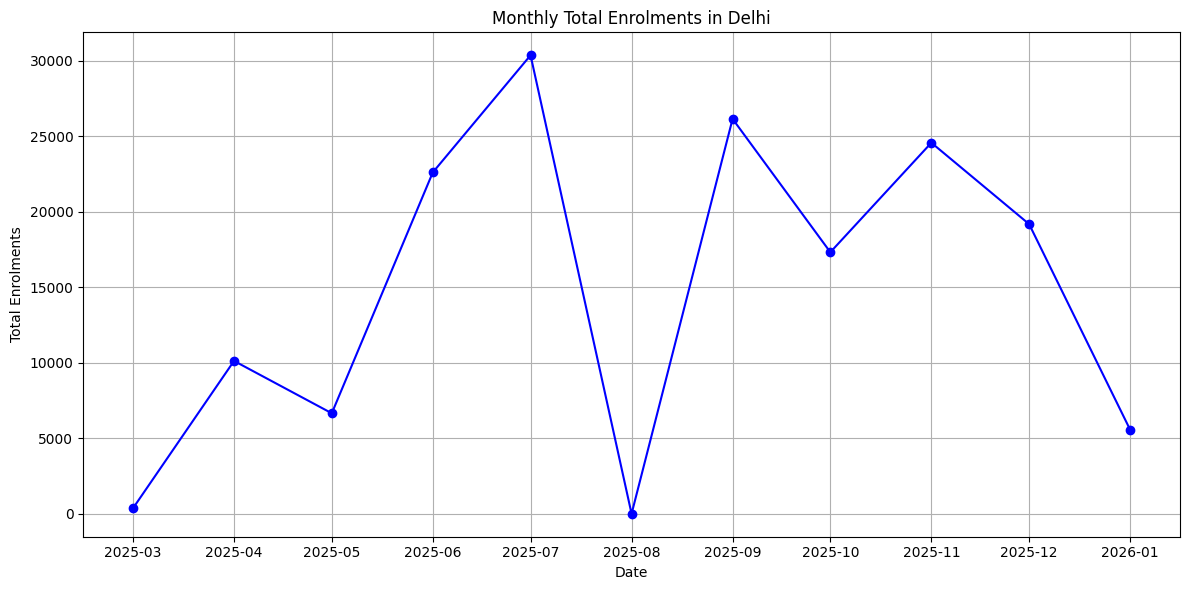

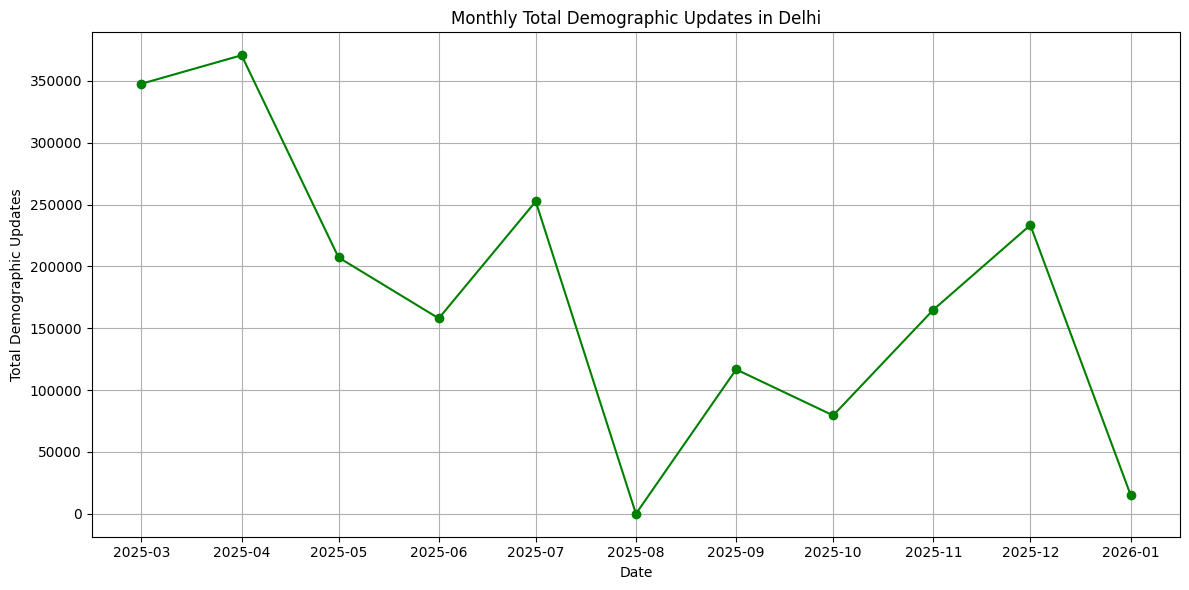

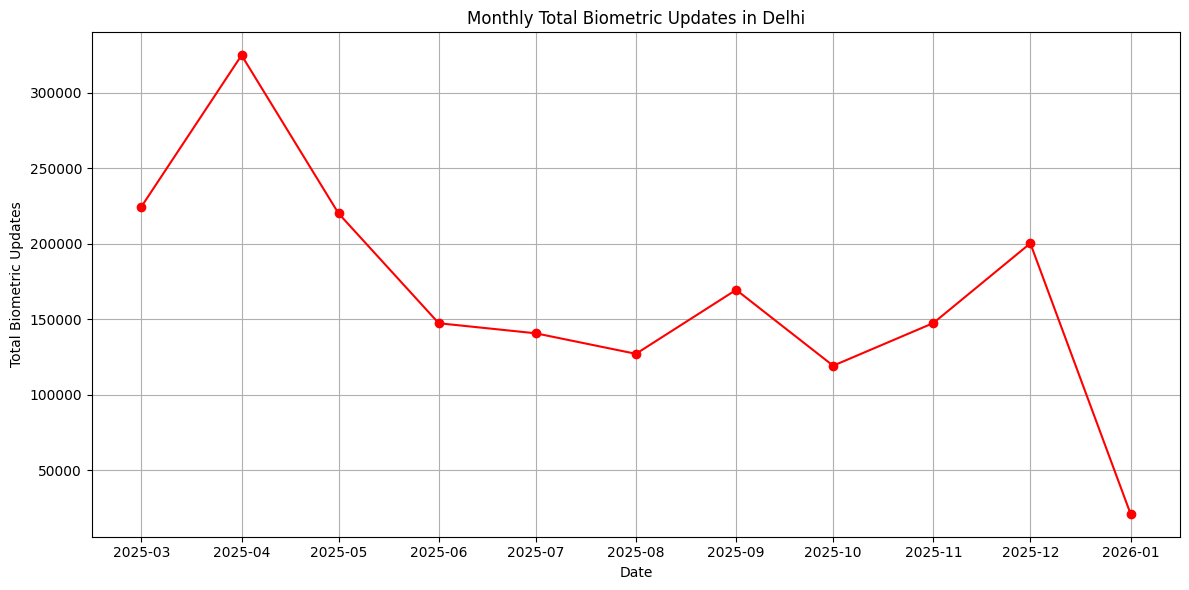

Monthly trend plots generated successfully.


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

df_dl_monthly_trends = df_dl_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_dl_monthly_trends['date'] = pd.to_datetime(df_dl_monthly_trends['year'].astype(str) + '-' + df_dl_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_dl_monthly_trends = df_dl_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dl_monthly_trends['date'], df_dl_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Delhi')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dl_monthly_trends['date'], df_dl_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Delhi')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_dl_monthly_trends['date'], df_dl_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Delhi')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

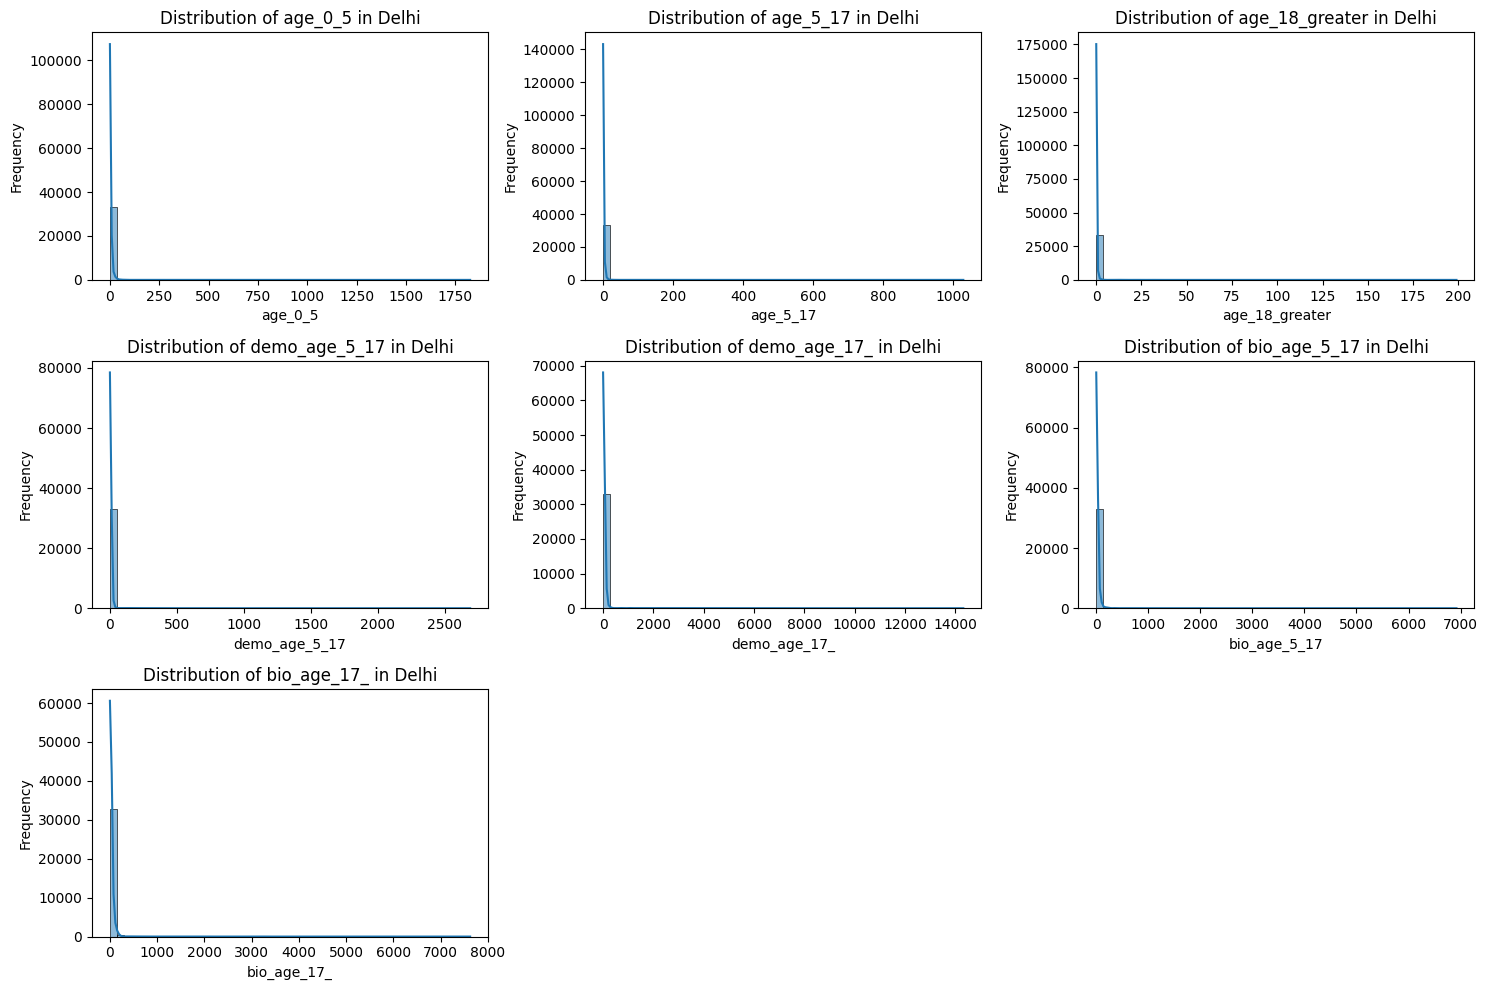

Histograms for numerical age-related columns displayed for Delhi.


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols_dl = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_dl):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_merged_dl[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Delhi')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns displayed for Delhi.")

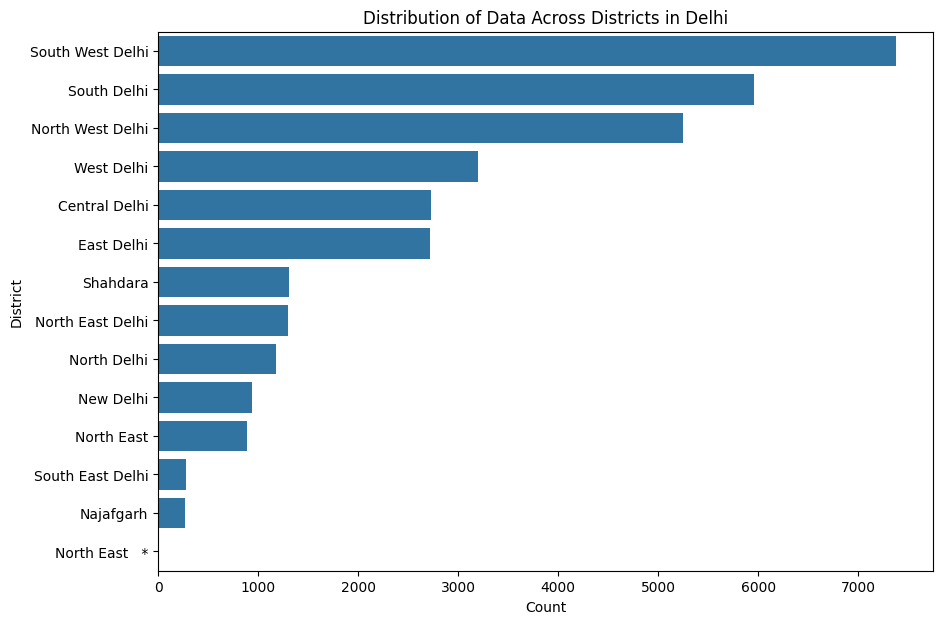

Count plot for 'district' displayed for Delhi.


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.countplot(data=df_merged_dl, y='district', order=df_merged_dl['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Delhi')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Delhi.")

**Bivaraite and Trivariate Anlaysis**

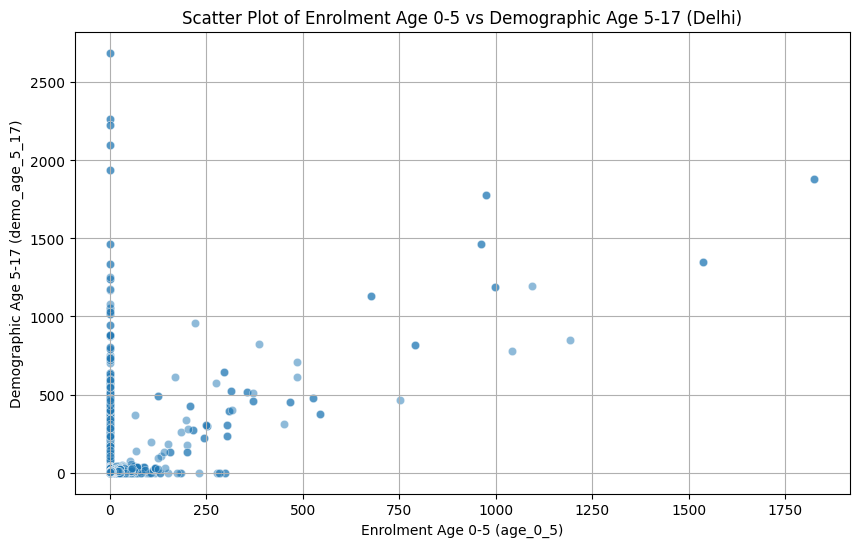

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Delhi.


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_dl, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Delhi)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Delhi.")

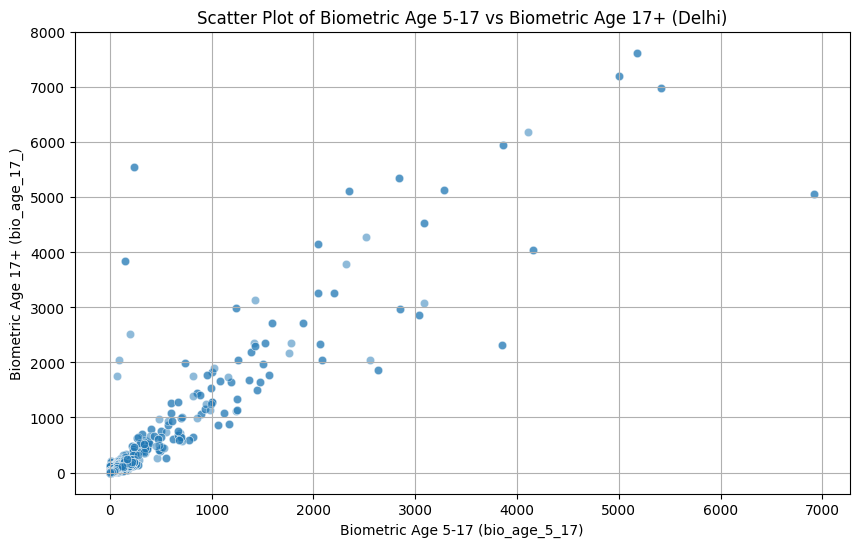

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Delhi.


In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_dl, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Delhi)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Delhi.")

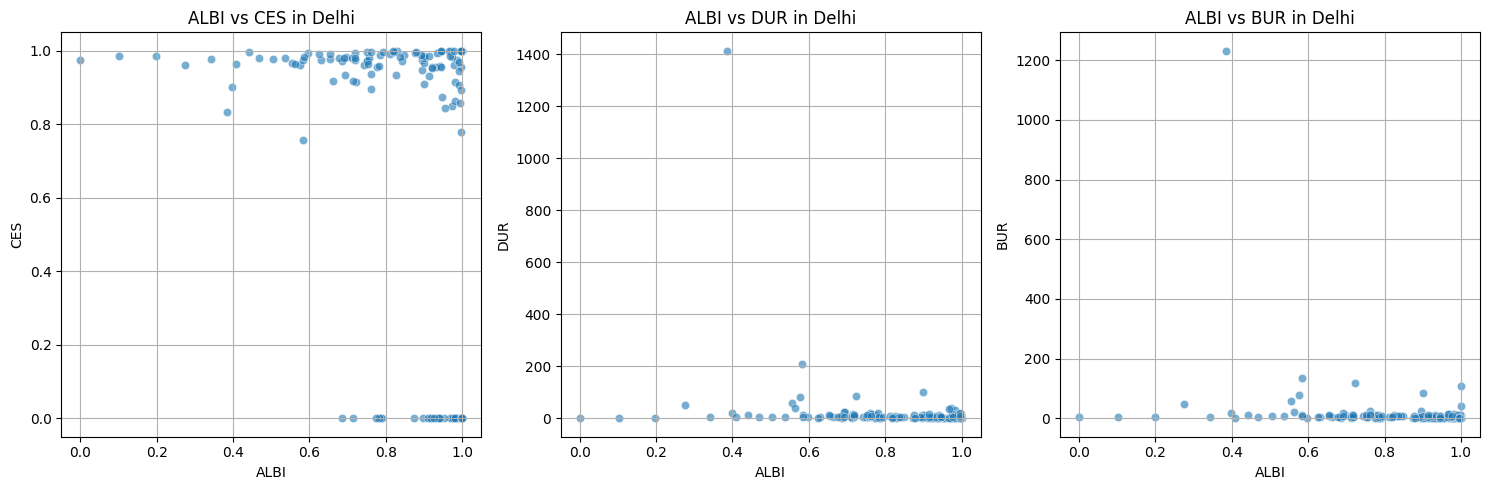

In [80]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_dl_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Delhi')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

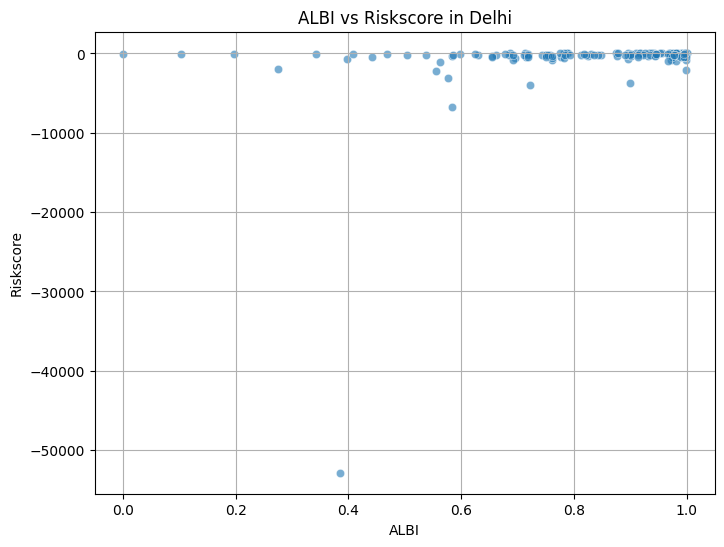

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Delhi.


In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dl_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Delhi')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Delhi.")

Correlation Matrix for Delhi:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.963084        0.704798       0.471199   
age_5_17        0.963084  1.000000        0.618106       0.456910   
age_18_greater  0.704798  0.618106        1.000000       0.348520   
demo_age_5_17   0.471199  0.456910        0.348520       1.000000   
demo_age_17_    0.478538  0.443059        0.443129       0.907187   
bio_age_5_17    0.139964  0.108913        0.174878       0.726808   
bio_age_17_     0.128475  0.100707        0.175299       0.651319   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.478538      0.139964     0.128475  
age_5_17            0.443059      0.108913     0.100707  
age_18_greater      0.443129      0.174878     0.175299  
demo_age_5_17       0.907187      0.726808     0.651319  
demo_age_17_        1.000000      0.724414     0.711651  
bio_age_5_17        0.724414      1.000000     0.915574  
bio_age_17_

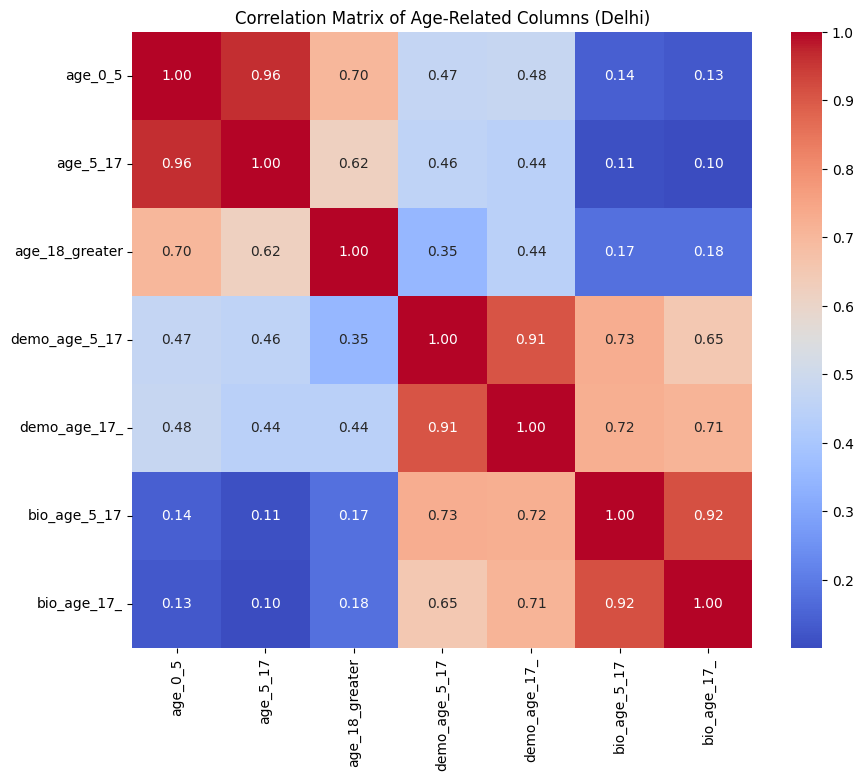

Correlation matrix heatmap for age-related columns displayed for Delhi.


In [82]:
numerical_age_cols_dl = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_dl = df_merged_dl[numerical_age_cols_dl].corr()

print("Correlation Matrix for Delhi:")
print(correlation_matrix_dl)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dl, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Delhi)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Delhi.")

Top 10 districts by total average age-related counts for Delhi:
            district  total_avg_age
7   North East Delhi     325.342857
13        West Delhi     197.563301
8   North West Delhi     185.574695
1         East Delhi     151.595737
4        North Delhi     149.629881
10       South Delhi      98.491022
5         North East      89.738983
12  South West Delhi      59.199892
0      Central Delhi      55.008804
9           Shahdara      47.515709


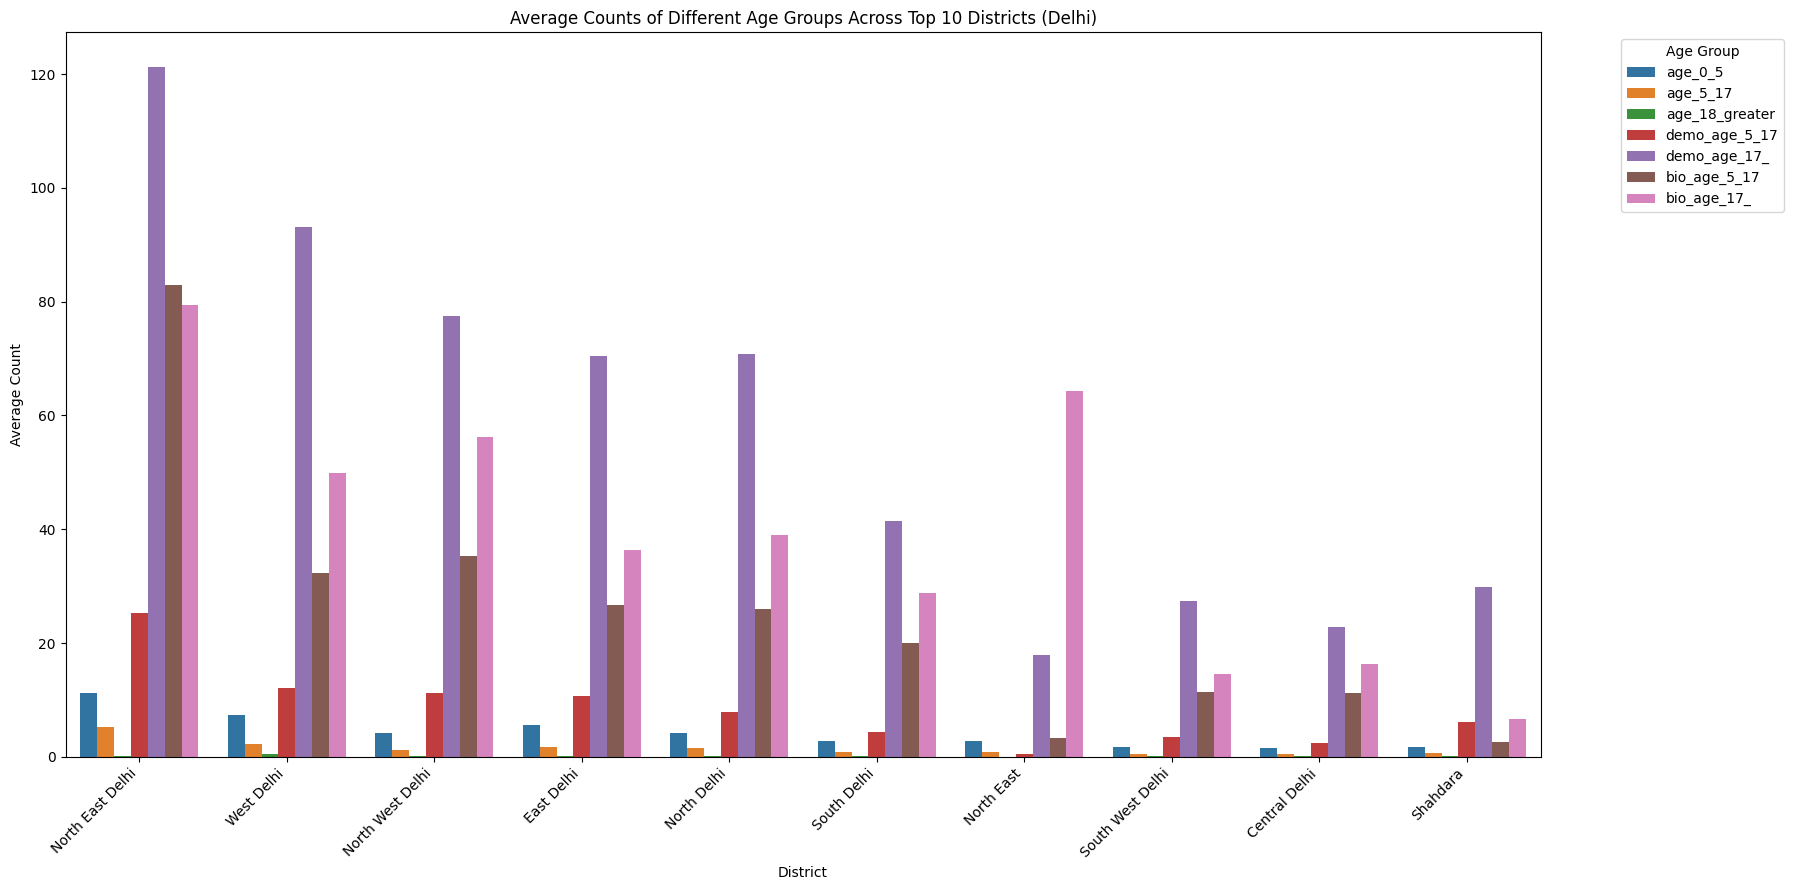

Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Delhi, providing insights into their overall activity and the relative contribution of each age group.


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for grouping and sum
age_cols_to_group_dl = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by district and calculate the mean of age-related columns
df_dl_district_mean = df_merged_dl.groupby('district')[age_cols_to_group_dl].mean().reset_index()

# Calculate total_avg_age for each district
df_dl_district_mean['total_avg_age'] = df_dl_district_mean[age_cols_to_group_dl].sum(axis=1)

# Get the top 10 districts based on 'total_avg_age'
df_dl_district_mean_top10 = df_dl_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Delhi:")
print(df_dl_district_mean_top10[['district', 'total_avg_age']])

# Melt the DataFrame for grouped bar chart plotting
df_dl_district_mean_melted = df_dl_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group_dl,
    var_name='Age Group',
    value_name='Average Count'
)

# Create the grouped bar chart
plt.figure(figsize=(18, 9))
sns.barplot(data=df_dl_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Delhi)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Delhi, providing insights into their overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Delhi:
   year  month  age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  2025      3    181.0     102.0            85.0        32338.0   
1  2025      4   6974.0    2541.0           603.0        56129.0   
2  2025      5   4450.0    1776.0           427.0        29191.0   
3  2025      6  14329.0    7343.0           923.0        19632.0   
4  2025      7  20404.0    8856.0          1088.0        40386.0   

   demo_age_17_  bio_age_5_17  bio_age_17_       date  
0      315278.0       85213.0     139225.0 2025-03-01  
1      314545.0      141764.0     182903.0 2025-04-01  
2      178030.0       87138.0     132860.0 2025-05-01  
3      138341.0       50400.0      96943.0 2025-06-01  
4      212146.0       48272.0      92405.0 2025-07-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --

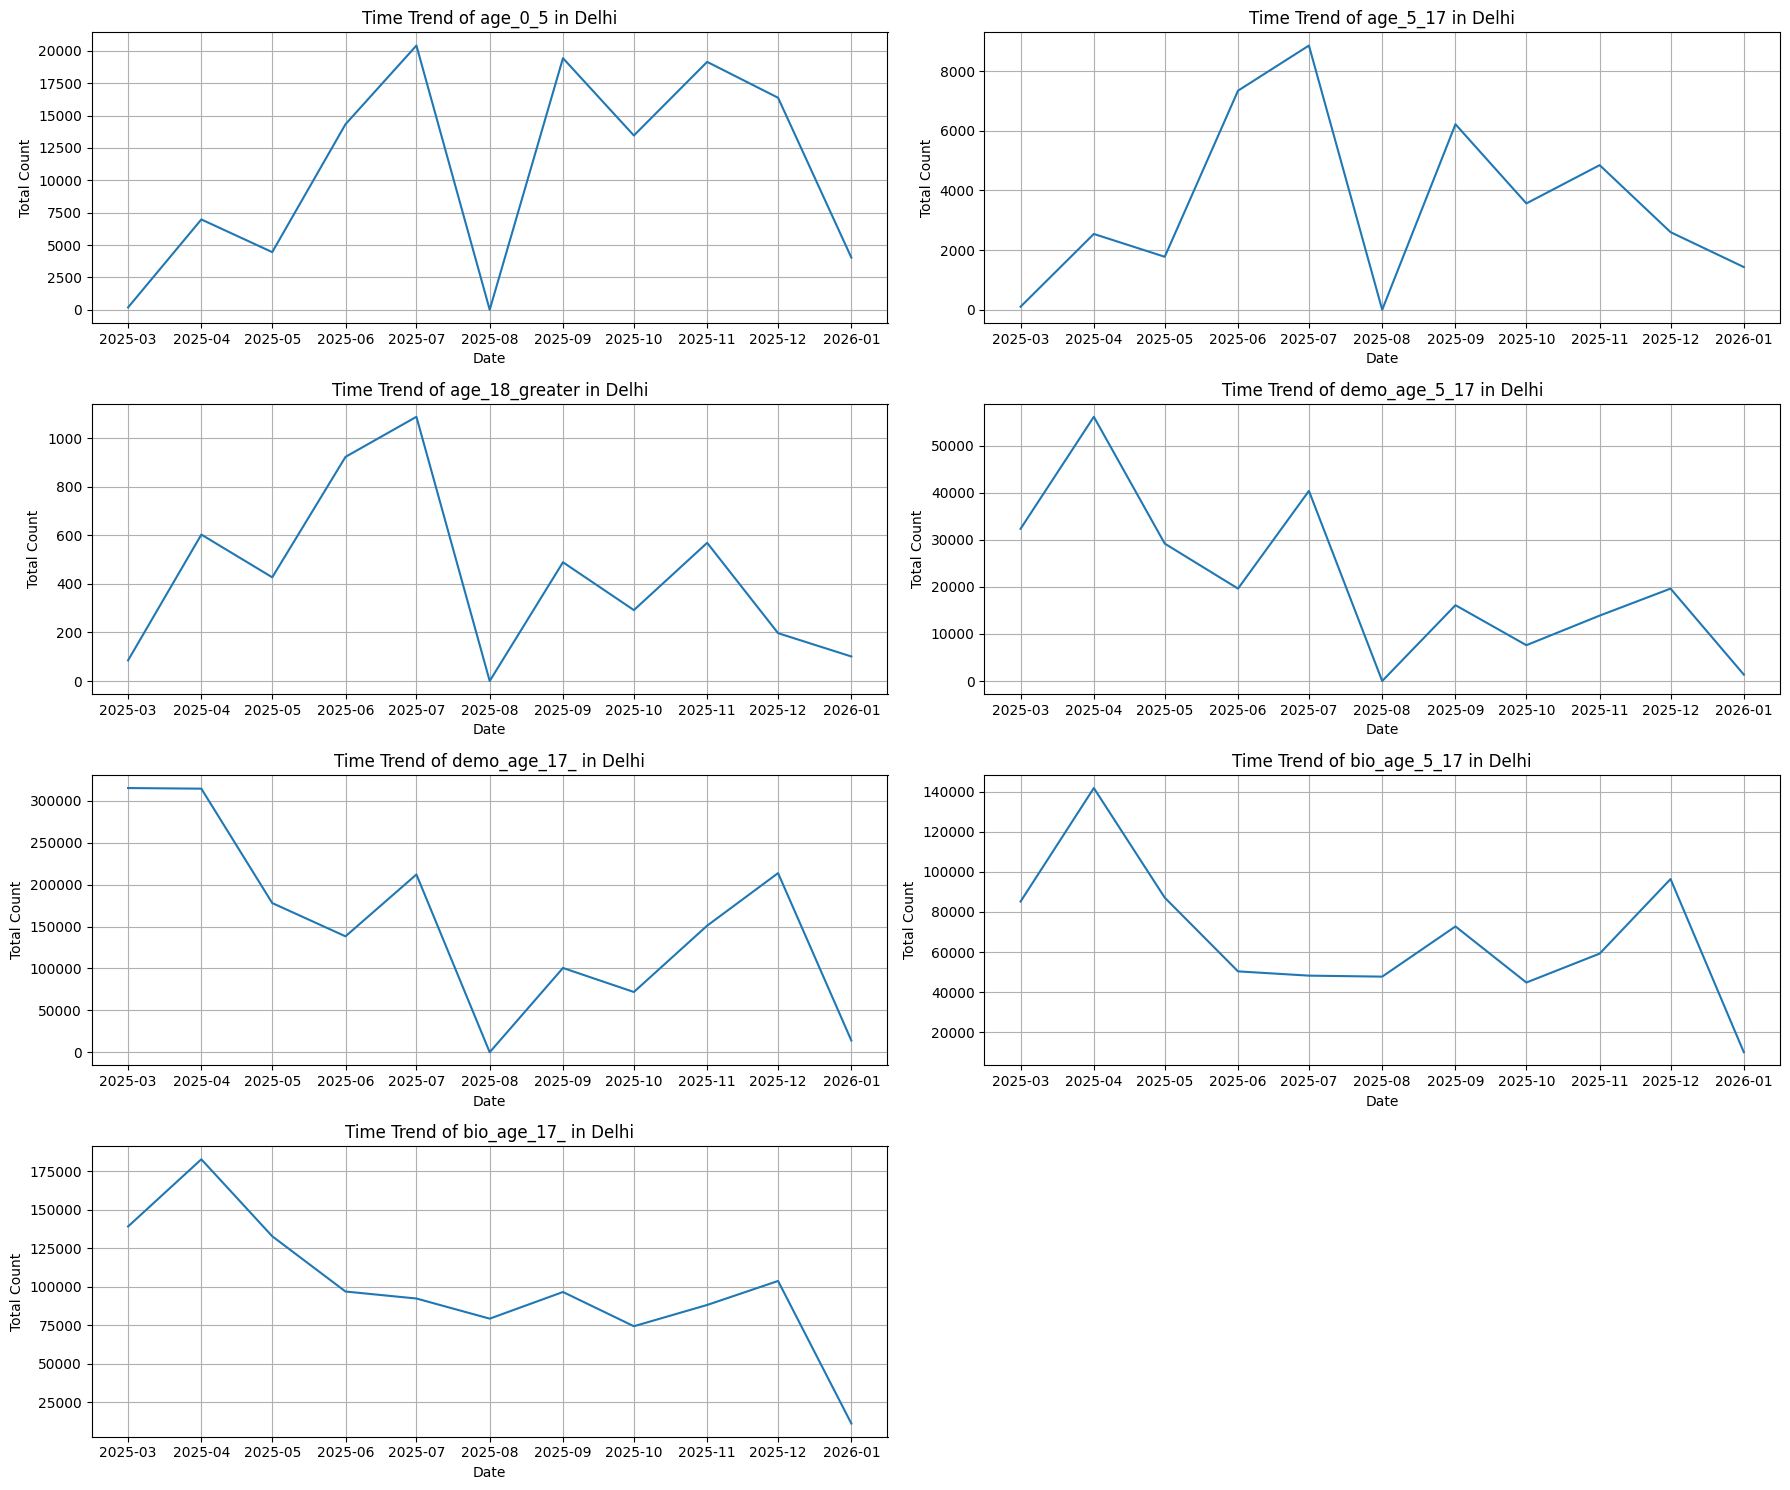

Insight: Line charts for each age-related column over time in Delhi provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for time trend analysis
age_cols_to_group_dl = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by year and month and sum the age-related columns
df_dl_time_trend = df_dl_agg.groupby(['year', 'month'])[age_cols_to_group_dl].sum().reset_index()

# Create a proper date column for plotting
df_dl_time_trend['date'] = pd.to_datetime(df_dl_time_trend['year'].astype(str) + '-' + df_dl_time_trend['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_dl_time_trend = df_dl_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Delhi:")
print(df_dl_time_trend.head())
print(df_dl_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group_dl):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_dl_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Delhi')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Delhi provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

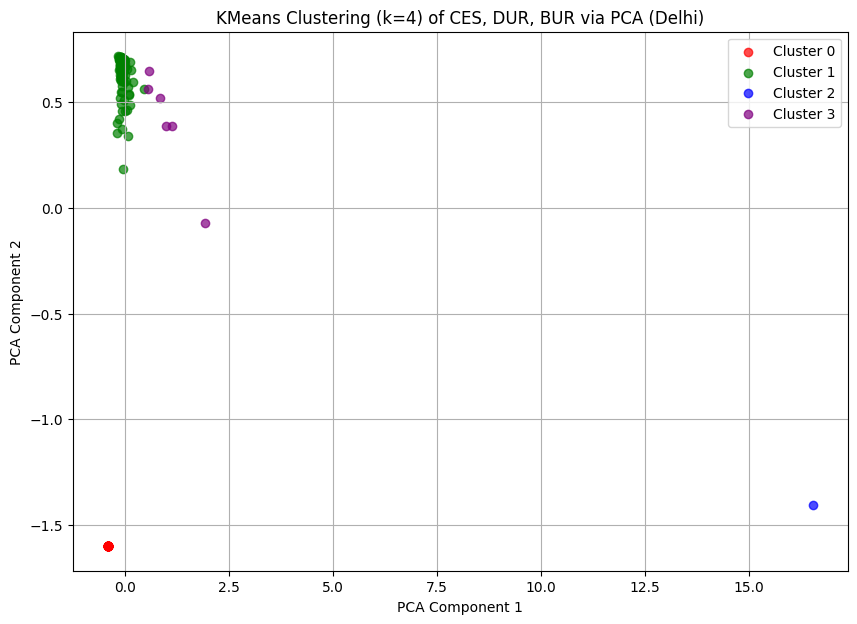

First 5 rows of df_dl_agg with 'clusterlabel' column:
   year  month  state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Delhi  Central Delhi      0.0       0.0             0.0   
1  2025      3  Delhi     East Delhi      0.0       0.0             0.0   
2  2025      3  Delhi      New Delhi      0.0       0.0             0.0   
3  2025      3  Delhi    North Delhi      0.0       0.0             0.0   
4  2025      3  Delhi     North East      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          956.0       11615.0        2018.0  ...  0.059648  0.066172   
1         3760.0       31136.0        7895.0  ...  0.243705  0.209731   
2          178.0         953.0         422.0  ...  0.008431  0.006975   
3         1246.0       13703.0        2556.0  ...  0.085098  0.083412   
4           34.0        4255.0         162.0  ...  0.048155  0.031845   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURris

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the 'CES', 'DUR', and 'BUR' columns from the df_dl_agg DataFrame as features for clustering.
features_for_clustering_dl = df_dl_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize these selected features using StandardScaler from sklearn.preprocessing.
scaler_dl = StandardScaler()
scaled_features_dl = scaler_dl.fit_transform(features_for_clustering_dl)

# 3. Apply KMeans clustering to the standardized features. Instantiate a KMeans object with n_clusters=4, random_state=42, and n_init=10, then fit it to the scaled features.
kmeans_dl = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_dl.fit(scaled_features_dl)

# 4. Add the resulting cluster labels as a new column named 'clusterlabel' to the df_dl_agg DataFrame.
df_dl_agg['clusterlabel'] = kmeans_dl.labels_

# 5. Apply PCA for dimensionality reduction. Instantiate a PCA object with n_components=2 and random_state=42, then fit and transform the scaled features to get 2 principal components.
pca_dl = PCA(n_components=2, random_state=42)
pca_components_dl = pca_dl.fit_transform(scaled_features_dl)

# 6. Create a new DataFrame from the PCA components, naming the columns 'PCA Component 1' and 'PCA Component 2', and add the 'clusterlabel' column to it.
pca_df_dl = pd.DataFrame(data=pca_components_dl, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_dl['clusterlabel'] = df_dl_agg['clusterlabel']

# 7. Generate a scatter plot to visualize the clusters using the two PCA components. Each cluster should be colored differently, and a legend should be included.
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df_dl[pca_df_dl['clusterlabel'] == i]['PCA Component 1'],
        pca_df_dl[pca_df_dl['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Delhi)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Print the first 5 rows of the df_dl_agg DataFrame to show the newly added 'clusterlabel' column.
print("First 5 rows of df_dl_agg with 'clusterlabel' column:")
print(df_dl_agg.head())

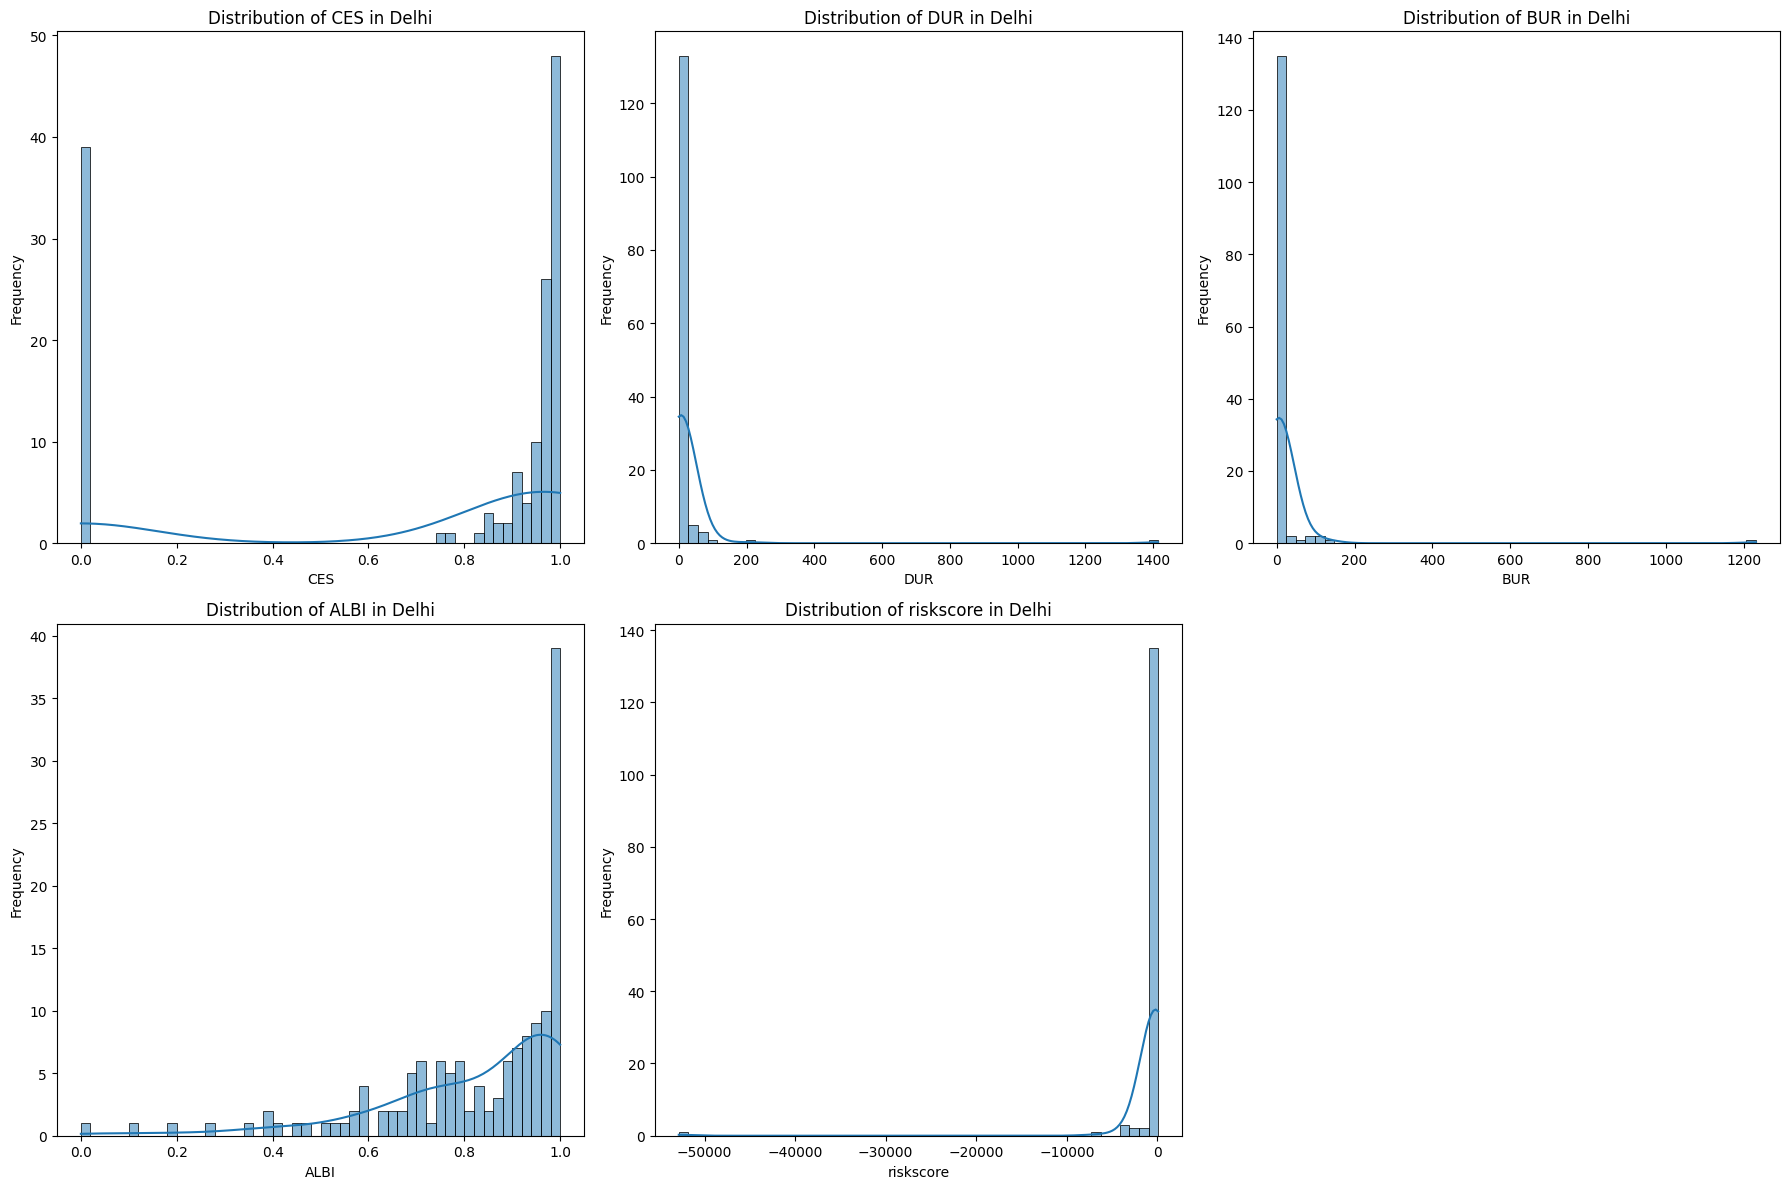

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Delhi.


In [86]:
metrics_to_plot_dl = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot_dl):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_dl_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Delhi')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Delhi.")

In [87]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_dl_agg['year'].max()
latest_month = df_dl_agg[df_dl_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_dl_agg for the latest year and month
df_latest_month_dl = df_dl_agg[(df_dl_agg['year'] == latest_year) & (df_dl_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics_dl = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_dl:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10_dl = df_latest_month_dl.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10_dl[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10_dl = df_latest_month_dl.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10_dl[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
        district      CES
       Najafgarh 1.000000
       New Delhi 1.000000
      North East 1.000000
South East Delhi 1.000000
     North Delhi 0.995745
North East Delhi 0.991071
North West Delhi 0.986395
      East Delhi 0.984450
   Central Delhi 0.981763
      West Delhi 0.978873

Bottom 10 Districts by CES (Year 2026, Month 1):
        district      CES
        Shahdara 0.875000
     South Delhi 0.973684
South West Delhi 0.976744
      West Delhi 0.978873
   Central Delhi 0.981763
      East Delhi 0.984450
North West Delhi 0.986395
North East Delhi 0.991071
     North Delhi 0.995745
      North East 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
        district      DUR
South East Delhi 8.333333
        Shahdara 6.520833
       New Delhi 5.562500
South West Delhi 3.654485
      West Delhi 3.338028
   Central Delhi 3.273556
      East Delhi

## Summary (Delhi):

The Aadhaar lifecycle analysis for Delhi provides a detailed view of enrolment and update activities across its districts. The `df_dl_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_merged_dl` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Najafgarh, New Delhi, North East, and South East Delhi achieved a perfect CES of 1.0. Shahdara (0.875) had the lowest CES, followed by South Delhi (0.974), indicating a lower proportion of child enrolments relative to total enrolments in the latest period.
    *   **DUR (Demographic Update Rate)**: South East Delhi (8.33) and Shahdara (6.52) had the highest DUR, suggesting strong demographic update activity relative to enrolments. Najafgarh (1.0) and North Delhi (1.18) had the lowest DURs.
    *   **BUR (Biometric Update Rate)**: New Delhi (8.13) and Central Delhi (7.32) showed the highest BURs. South East Delhi (0.5) and North Delhi (1.34) were among the lowest, indicating less frequent biometric updates relative to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Najafgarh (0.997) and South East Delhi (0.996) exhibited the best balance, close to 1. South Delhi (0.0) and North West Delhi (0.102) had the lowest balance.
    *   **Risk Score**: North Delhi (8.30) and Najafgarh (6.63) showed the highest positive risk scores. Similar to other states, several districts showed negative risk scores, notably New Delhi (-213.48) and Central Delhi (-148.76), highlighting the need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Delhi's districts.

### Conclusion:

Delhi exhibits varied performance across its districts in Aadhaar lifecycle management. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The consistent observation of problematic `riskscore` values across multiple states, including Delhi, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.